In [1]:
import pandas as pd 
import numpy as np

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\pawar\AppData\Local\Temp\ipykernel_5932\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

C:\Users\pawar\AppData\Local\Temp\ipykernel_5932\344263642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


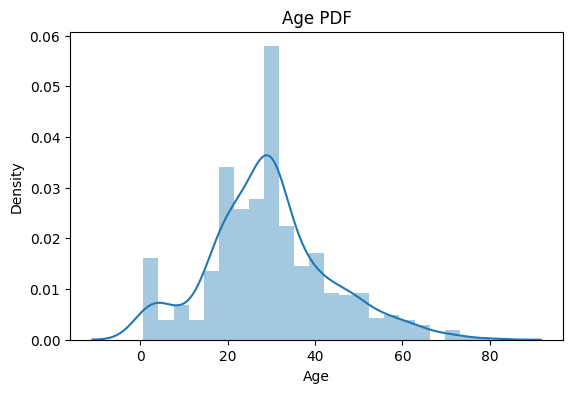

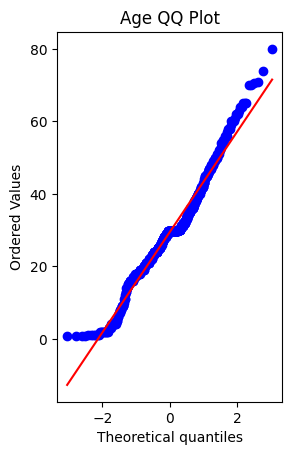

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')
plt.show()

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.5838926174496645
Accuracy DT 0.5973154362416108


In [29]:
trf = FunctionTransformer(func= np.log1p)


In [31]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6174496644295302
Accuracy DT 0.5973154362416108


In [32]:
x_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))



LR 0.6591891891891892
DT 0.5639099099099099


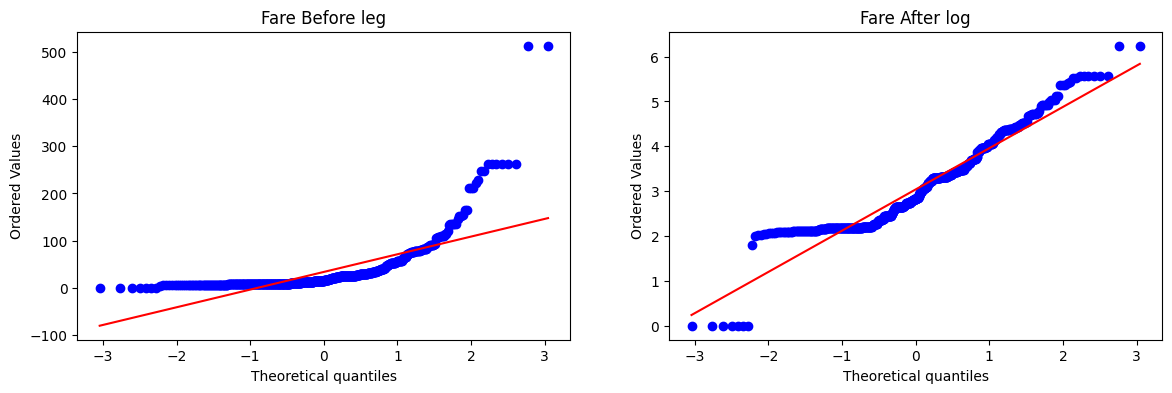

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Fare Before leg')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After log')

plt.show()

In [35]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [36]:
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.5973154362416108
Accuracy DT 0.5973154362416108


In [38]:
X_transformed2 = trf2.fit_transform(X)

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6483603603603603
DT 0.5585945945945946


In [41]:
def apply_transform(transform):
  x = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('log', FunctionTransformer(transform),['Fare'])],remainder='passthrough')
  X_trans = trf.fit_transform(x)
  clf = LogisticRegression()
  print('Accur', np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv = 10)))
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist="norm", plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist="norm", plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accur 0.6


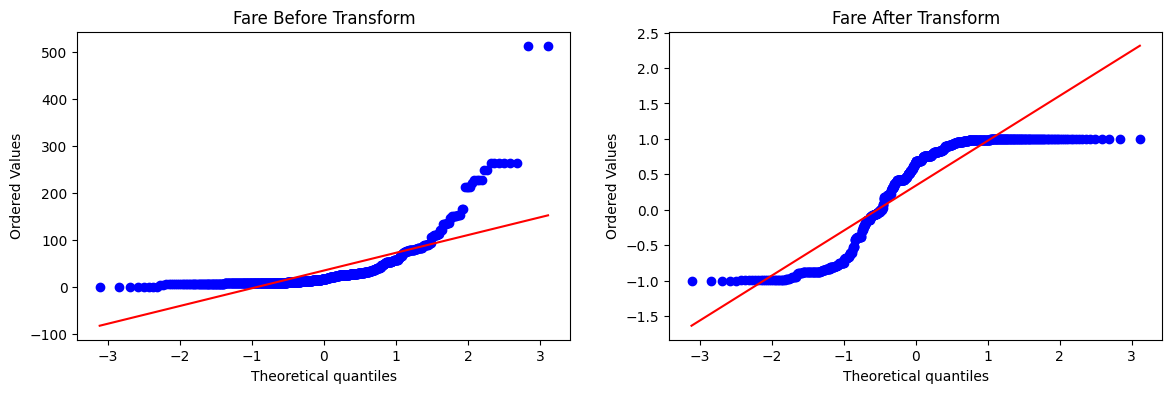

In [42]:
apply_transform(np.sin)